In [1]:
import re
import json
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
import networkx as nx
import matplotlib.pyplot as plt
from collections import namedtuple
from __future__ import division
from math import log

In [2]:
movie_data = namedtuple('movie', 'scenes, occurrences')

In [3]:
word_tokenizer = RegexpTokenizer(r'(\w+[-|\']?\w*)')

In [4]:
def script_to_secnens_dict(file_name):
    script = open(file_name,"r").read().decode("utf-8")
    scenes = defaultdict(str)
    matches = regex.finditer(script)
    for match in matches:
        sceneId = match.group(1)
        dialog = match.group(2)
        scenes[sceneId] += dialog
    return scenes

In [5]:
def process_script(script, tokenizer, name_mappings, special_cases=[], ignore=[]):
    occurrences = defaultdict(set)
    #divide script into scenes ignore the title, introduction, revisions, etc. 
    scenes = script.split("_START OF NEW SCENE_")[1:]
    
    for index, scene in enumerate(scenes):
        text = scene.lower()
        tokens = tokenizer.tokenize(text)

        for key, name in special_cases.iteritems():
            if key in ignore:
                continue
            elif key in scene:
                occurrences[index].add(special_cases[key])

        for token in tokens:
            if token in ignore:
                continue
            elif name_mappings.has_key(token):
                occurrences[index].add(name_mappings[token][0])
    
    return movie_data(scenes=scenes, occurrences=occurrences)

In [6]:
def generate_movie_network(occurrences):
    network = nx.Graph()
    for scene, characters in occurrences.iteritems():
        for character in characters:
            network.add_node(character)
            for other in characters:
                if character != other:
                    network.add_edge(character, other)
    return network

In [7]:
def display_network(G, size_map=300):
    plt.figure(figsize=(20,20))
    plt.axis("off")
    nx.draw_networkx(G, alpha=0.65, with_labels=True, edge_color="#cccccc", node_size=size_map)                

In [8]:
#[2 + G.degree(n) for n in G.nodes]

In [9]:
def debug_characters_in_scenes(movie, sceneId):
    print movie.occurrences[sceneId], movie.scenes[sceneId]

In [10]:
def total_occurences(occurences, character):
    return sum(1 for characters in occurences.values() if character in characters)

In [11]:
def debug_scenes_by_character(movie, name):
    for scene, character in movie.occurrences.iteritems():
        if  name in character:
            print movie.scenes[scene]

In [12]:
def save_as_json(data, file_name):
    with open("../movieScripts/processed/" + file_name + ".json", 'w') as f:
        f.write(json.dumps(data))

In [13]:
files = [
    "(1)_Harry_Potter_and_the_Philosophers_Stone.txt",
    "(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt",
    "(3)_Harry_Potter_and_the_Prisoner_of_Azkaban.txt",
    "(4)_Harry_Potter_and_the_Goblet_of_Fire.txt",
    "(5)_Harry_Potter_and_the_Order_of_the_Phoenix.txt",
    "(6)_Harry_Potter_and_the_Half-Blood_Prince.txt",
    "(7)_Harry_Potter_and_the_Deathly_Hallows_Part_1.txt",
    "(8)_Harry_Potter_and_the_Deathly_Hallows_Part_2.txt" 
]

In [14]:
with open('nameDict.json') as json_file:  
    name_dict = json.load(json_file, encoding="utf-8")

In [15]:
ignore_in_movie={
    "(1)_Harry_Potter_and_the_Philosophers_Stone.txt": {"bertie", "jack", "po"},
    "(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt": {"fluffy", "tufty", "gryffindor"},
    "(3)_Harry_Potter_and_the_Prisoner_of_Azkaban.txt": {"miranda", "ernie", "horace"},
    "(6)_Harry_Potter_and_the_Half-Blood_Prince.txt": {"WOOD"},
    "(7)_Harry_Potter_and_the_Deathly_Hallows_Part_1.txt": {"percival", "elizabeth", "WOOD"},
    "(8)_Harry_Potter_and_the_Deathly_Hallows_Part_2.txt": {"WOOD", "fang"}
}

In [16]:
special_cases = {
    "WOOD":"oliver wood", 
    "OLIVER WOOD":"oliver wood", 
    "oliver wood": u"oliver wood",
    "Oliver wood": u"oliver wood",
    "mrs. weasley": u"molly weasley", 
    "mr. weasley": u"arthur weasley",
    "arthur weasley's daughter": u"ginny weasley",
    "ERNIE PRANG": u"ernie prang",
    "wailing widow": u"wailing widow",
    "Miss Brown": u"lavender brown",
    "MRS BLACK": u"walburga black",
    "BARTY JR": u"barty crouch jr.",
    "BARTY SR": u"barty crouch",
    "Frank Longbottom": u"frank longbottom",
    "HUGO": u"hugo granger-weasley",
    "ALBUS_SON": u"albus severus potter",
    "LILY_DAUGTER": u"lily l. potter",
    "ROSE_DAUGHTER": u"rose granger-weasley",
    "JAMES_SON": u"james potter ii",
    "ADRIAN": u"adrian (photographer)"
}

In [17]:
movies = []

In [18]:
for script_name in files:
    with open("../movieScripts/" + script_name) as f:
        script = f.read()
        ignore = []
        if ignore_in_movie.has_key(script_name):
            ignore = ignore_in_movie[script_name]
        
        data = process_script(
            script=script, 
            tokenizer=word_tokenizer, 
            name_mappings=name_dict, 
            special_cases=special_cases, 
            ignore=ignore
        )
        movies.append(data)

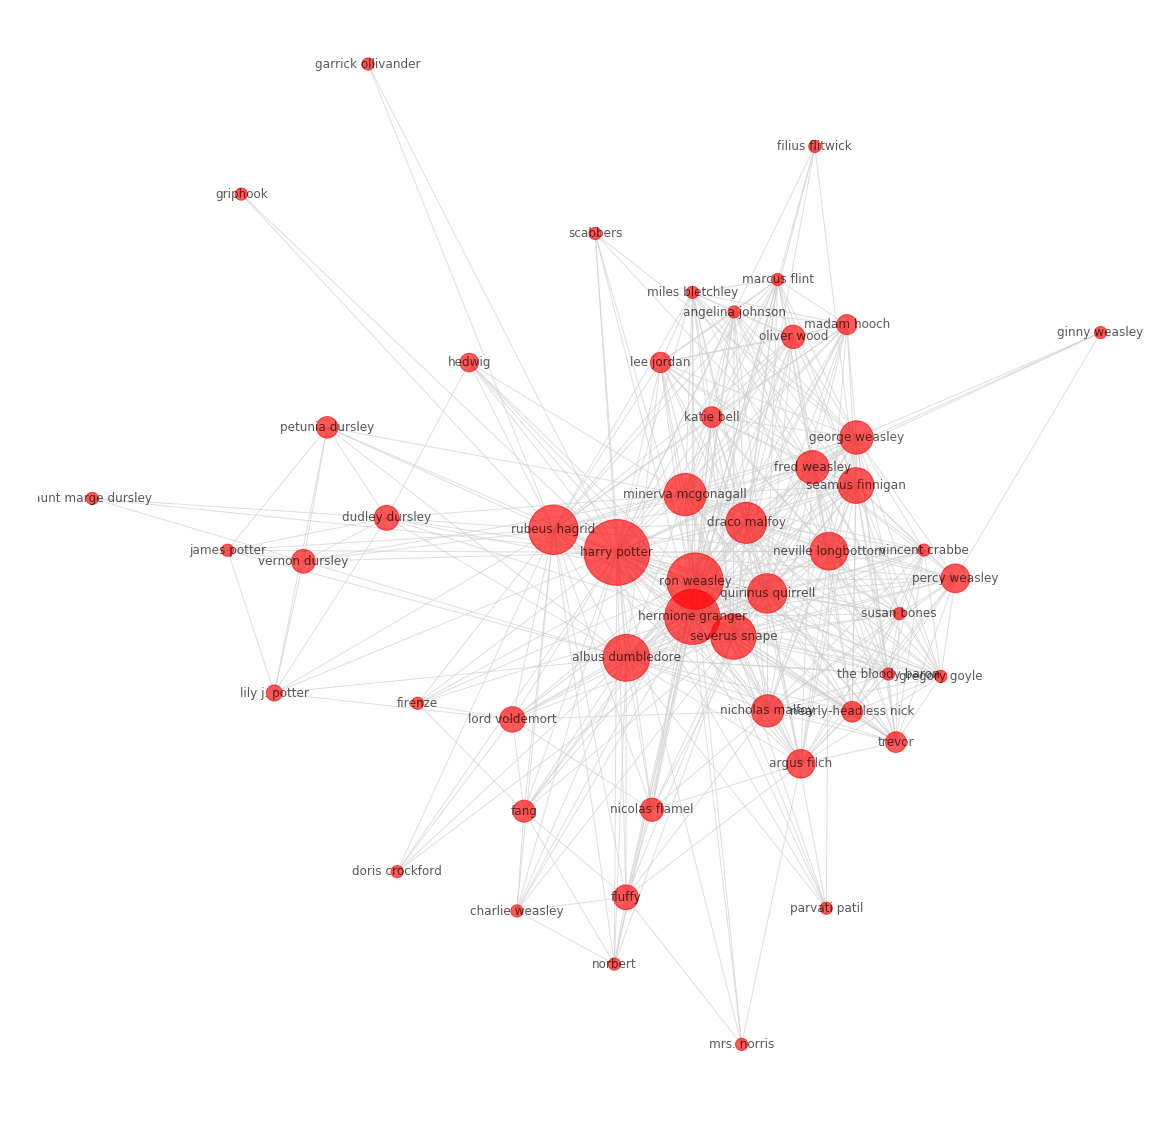

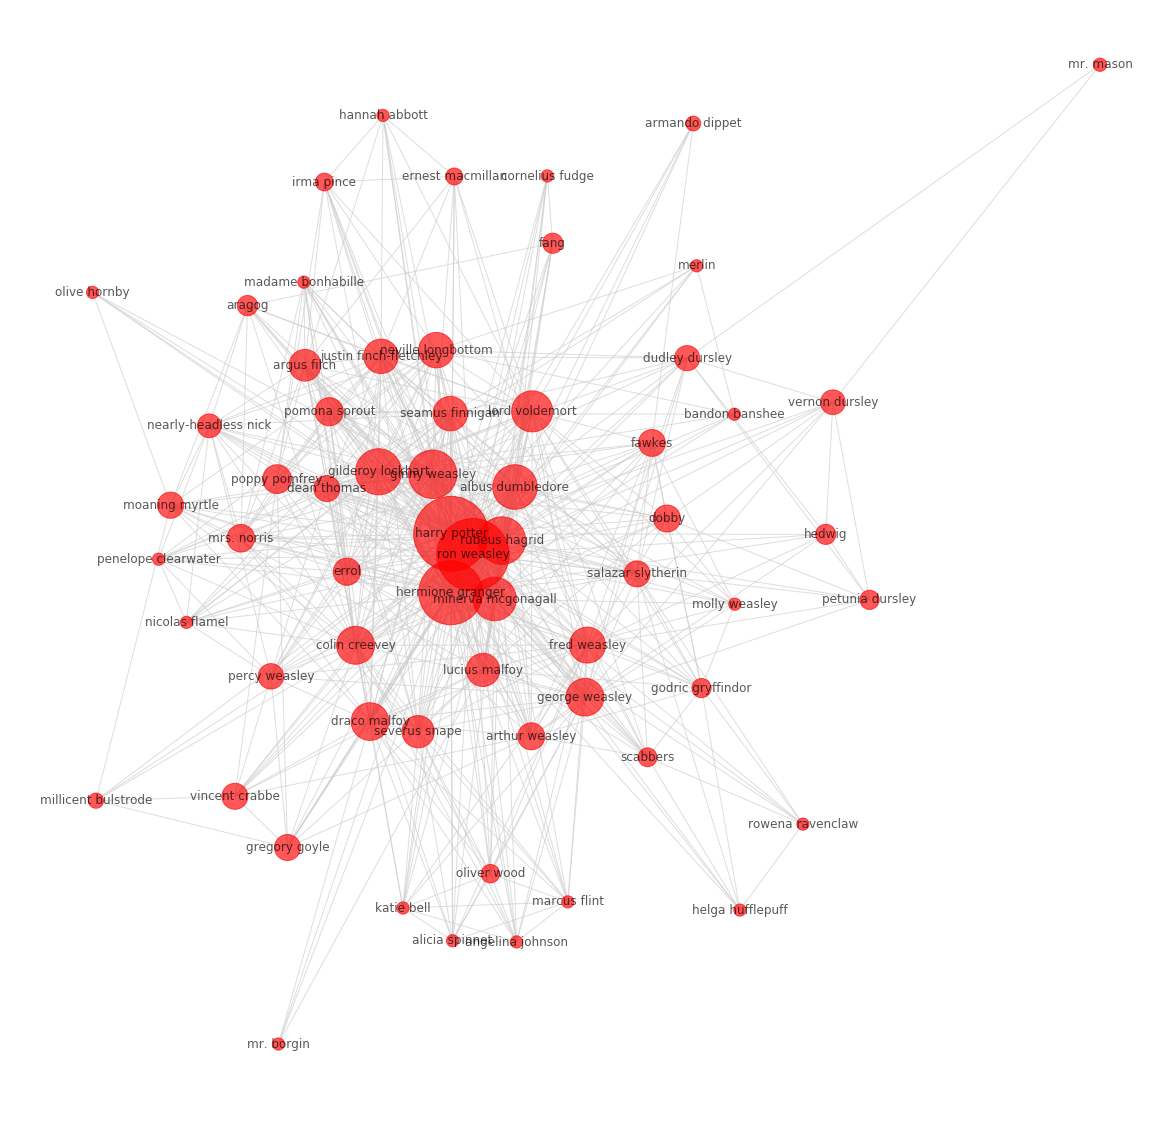

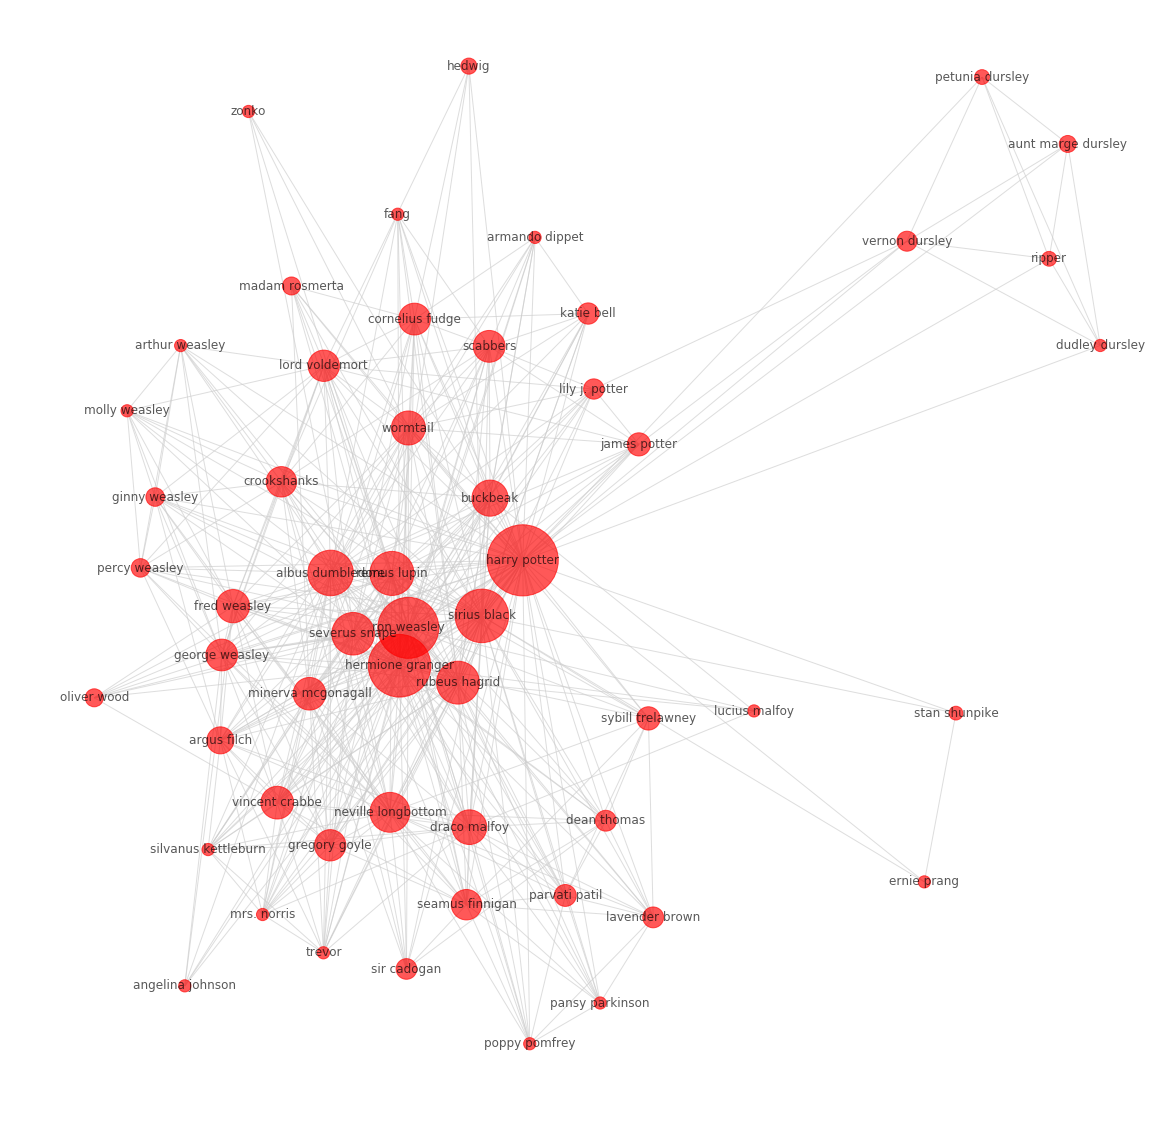

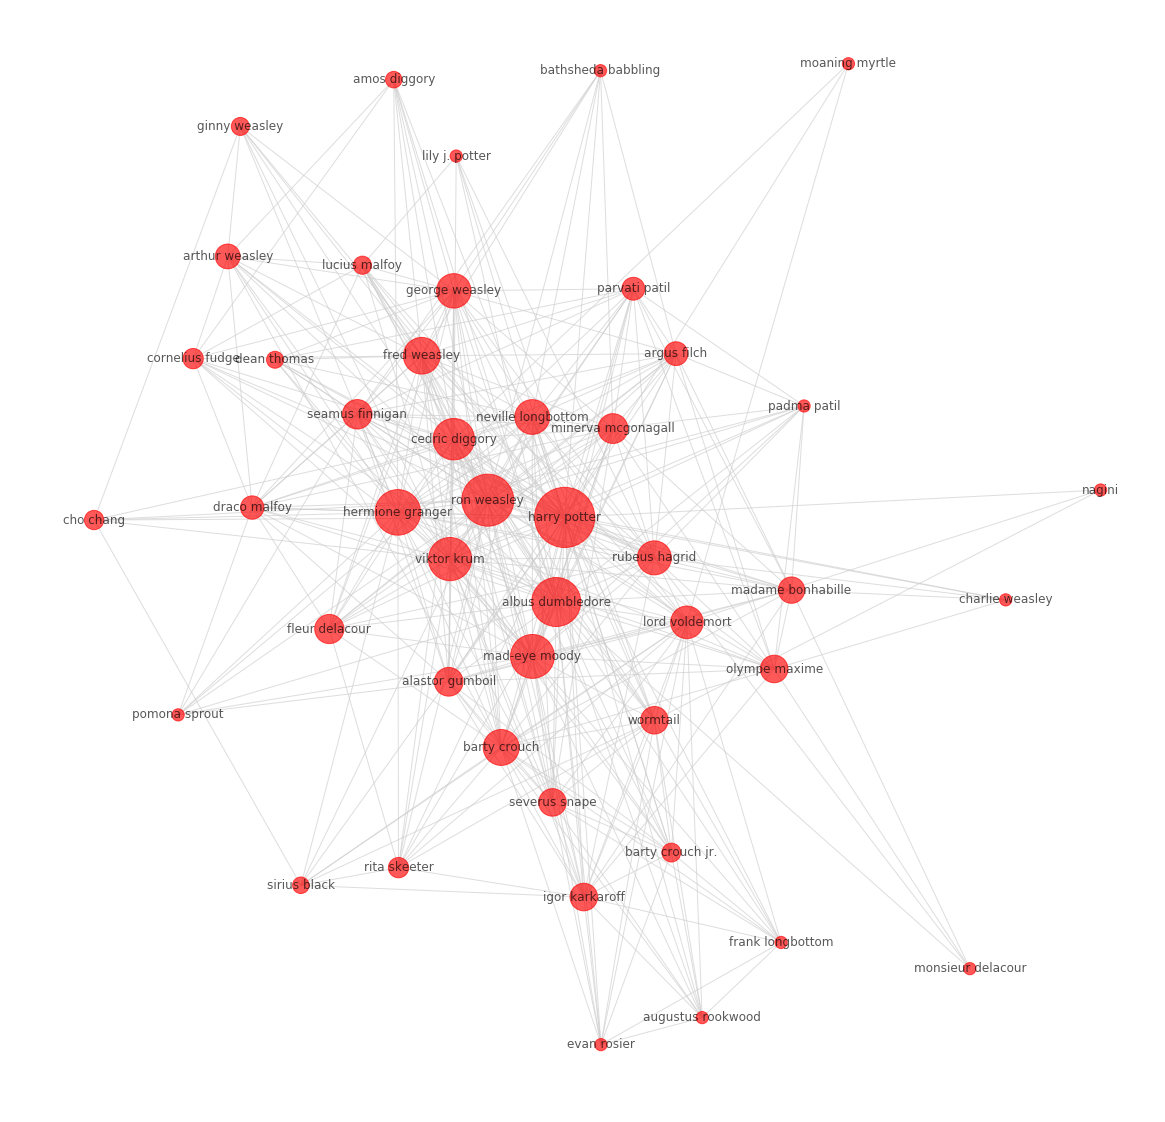

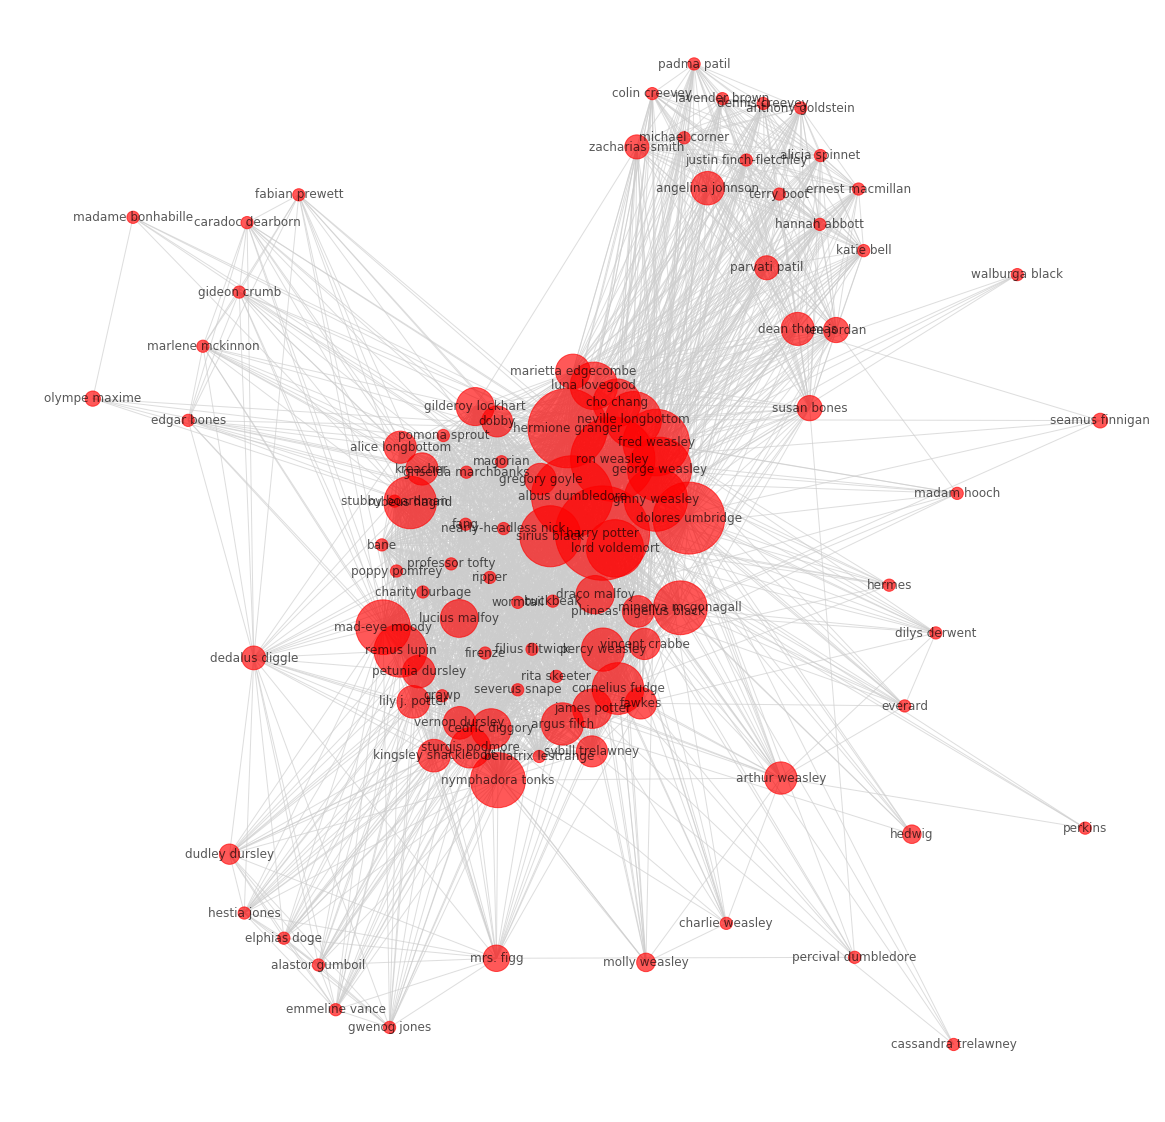

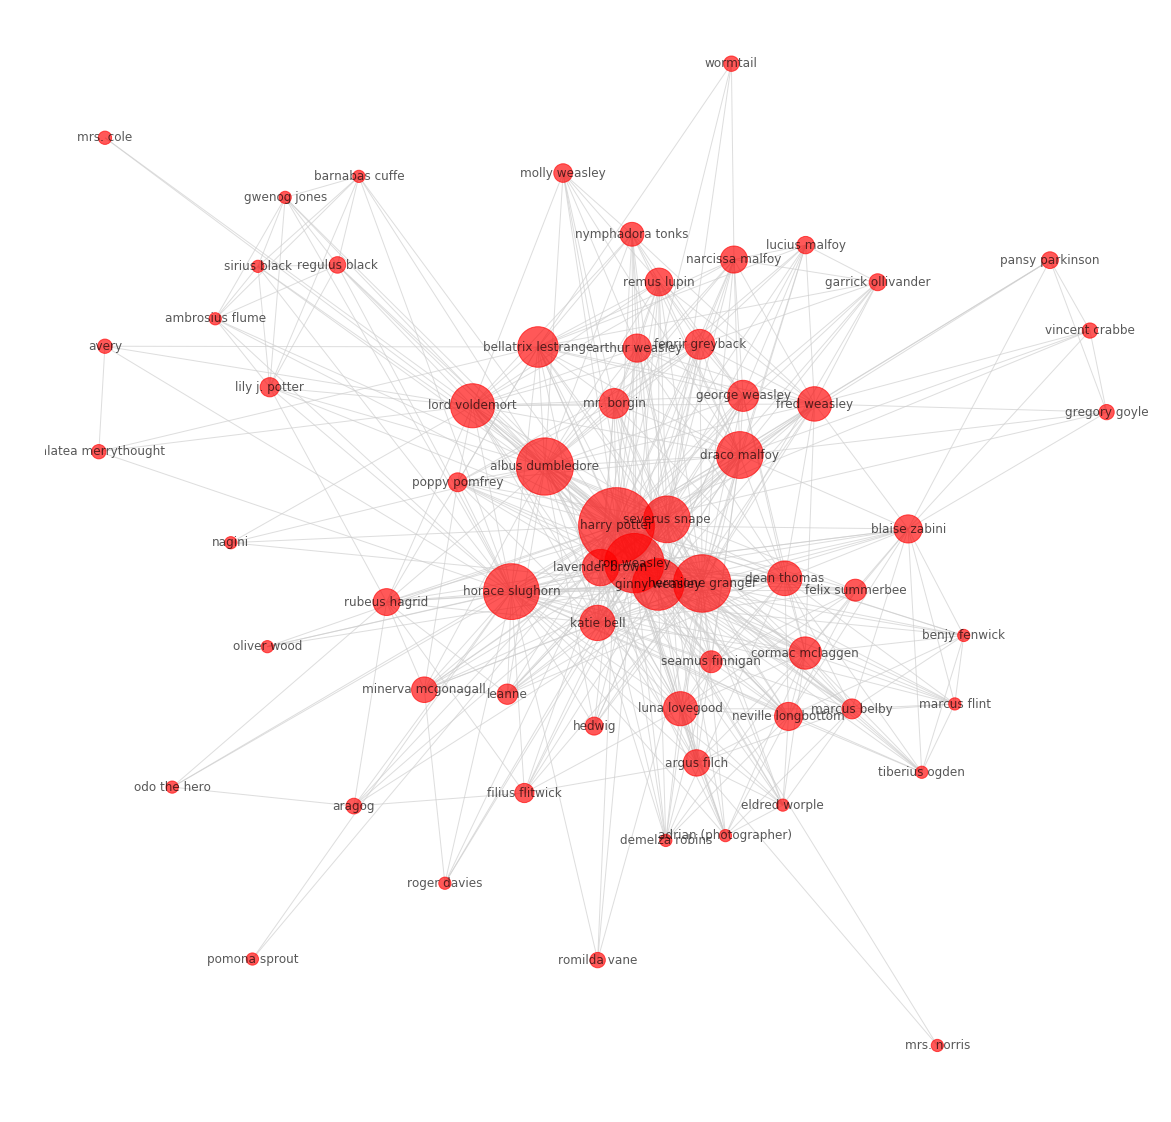

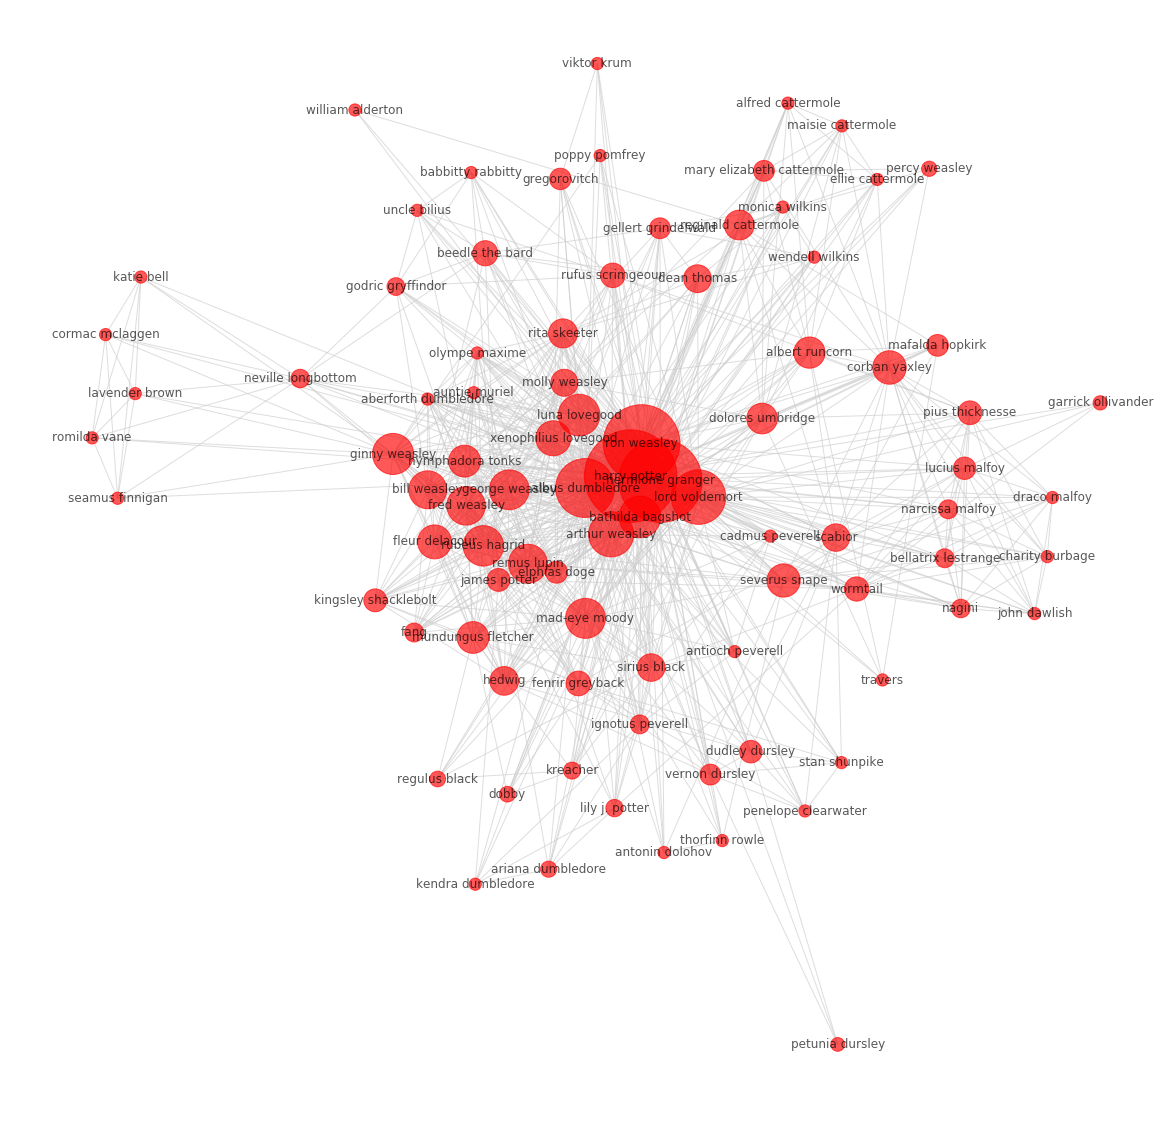

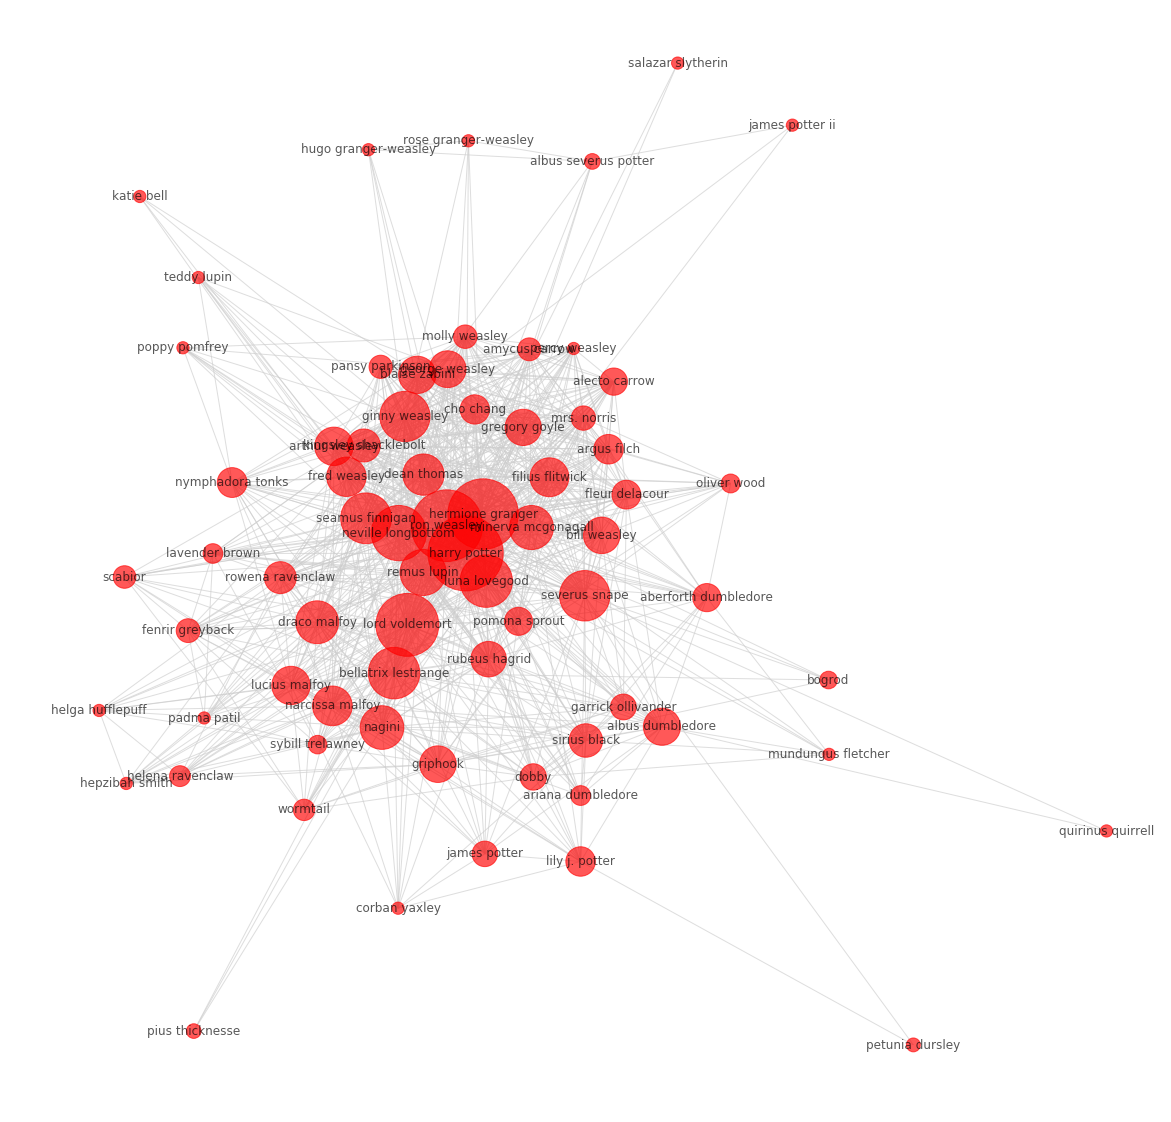

In [19]:
for movie in movies:
    G = generate_movie_network(movie.occurrences) 
    node_size = [150 + int(20 * G.degree(n) * log(total_occurences(movie.occurrences, n))) for n in G.nodes]
    display_network(G, node_size)

In [20]:
debug_scenes_by_character(movies[0], "gurg")

In [21]:
total_occurences(movie.occurrences, "katie bell")

1

Disadvantages of adding a note to each character taht is mentioned in a scene: the chatacter might only appear in one scene but could get an infalted degree if many other characters are mentioend in the scnene.

In [22]:
len(G.edges)

874